In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_data(file):
    return pd.read_csv(f"dataset/{file}")

In [3]:
titanic = load_data("train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(titanic, titanic["Pclass"]):
    strat_train_set = titanic.loc[train_index]
    strat_test_set = titanic.loc[test_index]
    
titanic = strat_train_set.copy() 

In [6]:
titanic.drop(["Name", "PassengerId", "Ticket"], axis=1, inplace=True)
cat_attr = ["Sex", "Cabin", "Embarked"]

In [7]:
corr_mat = titanic.corr()

corr_mat["Survived"].sort_values(ascending = False)

Survived    1.000000
Fare        0.251609
Parch       0.059978
SibSp      -0.060153
Age        -0.070720
Pclass     -0.334031
Name: Survived, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A74708FD68>,
      dtype=object)

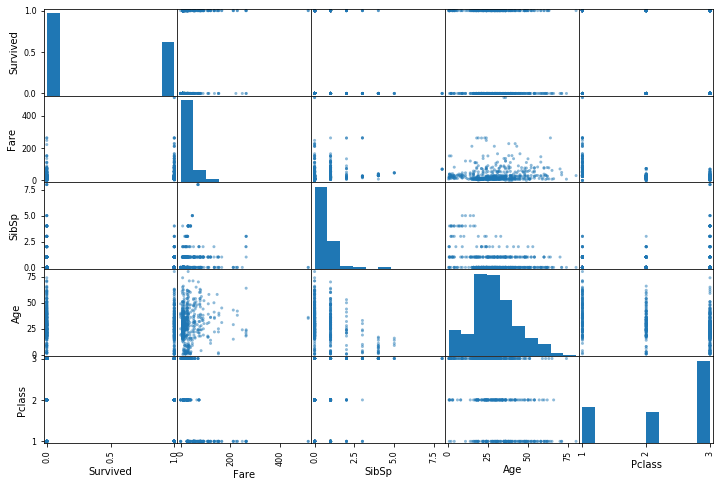

In [8]:
from pandas.plotting import scatter_matrix

attr = ["Survived", "Fare", "SibSp", "Age", "Pclass"]
scatter_matrix(titanic[attr], figsize=(12, 8))

In [9]:
titanic_labels = titanic["Survived"]
titanic.drop("Survived", axis=1, inplace=True)

In [10]:
t = titanic.loc[len(titanic)]
t["Cabin"] = 'T'

c:\users\harsh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
titanic_num = titanic.drop(cat_attr, axis=1)
X = imputer.fit_transform(titanic_num)

In [12]:
imputer.statistics_

array([ 3.    , 28.    ,  0.    ,  0.    , 14.4542])

In [13]:
titanic_tr = pd.DataFrame(X, columns=titanic_num.columns)
titanic_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  712 non-null    float64
 1   Age     712 non-null    float64
 2   SibSp   712 non-null    float64
 3   Parch   712 non-null    float64
 4   Fare    712 non-null    float64
dtypes: float64(5)
memory usage: 27.9 KB


In [14]:
titanic_cat = titanic[cat_attr]
titanic_cat.head()

,Sex,Cabin,Embarked
820,female,B69,S
439,male,NaN,S
821,male,NaN,S
403,male,NaN,S
343,male,NaN,S


In [15]:
def impute_cat():
    l = []

    for s in titanic_cat["Cabin"]:
        s = str(s)
        if s=="nan":
            s = "Z"
        l.append(s[0])
        #print(s)

    titanic_cat["Cabin"] = l
    #print(titanic_cat["Cabin"])

    l = []

    for s in titanic_cat["Embarked"]:
        s = str(s)
        if s=="nan":
            s = "Z"
        l.append(s[0])
        #print(s)

    titanic_cat["Embarked"] = l
#print(titanic_cat["Embarked"])

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        X.fillna(self.most_frequent_, inplace=True)
        X["Cabin"] = [s[0] for s in X["Cabin"]]
        return X

In [17]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder()
impute_data = MostFrequentImputer()
titanic_at_imputed = impute_data.fit_transform(titanic_cat)
titanic_cat_encoded = one_hot.fit_transform(titanic_at_imputed)

c:\users\harsh\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
c:\users\harsh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [18]:
one_hot.categories_

[array(['female', 'male'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], dtype=object),
 array(['C', 'Q', 'S'], dtype=object)]

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('imputer', MostFrequentImputer()),
    ('encoder', OneHotEncoder(sparse = False)),
])

In [20]:
from sklearn.compose import ColumnTransformer

num_attr = list(titanic_num)

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attr),
    ("cat", cat_pipeline, cat_attr)
])

In [21]:
titanic_prepared = full_pipeline.fit_transform(titanic)

In [22]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(titanic_prepared, titanic_labels)

SGDClassifier(random_state=42)

In [23]:
sgd_prediction = sgd_clf.predict(titanic_prepared)

In [24]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score

def view_score(labels, prediction):
    print(precision_score(labels, prediction))
    print(recall_score(labels, prediction))
    print(confusion_matrix(labels, prediction))

In [25]:
view_score(titanic_labels, sgd_prediction)

0.7517985611510791
0.7464285714285714
[[363  69]
 [ 71 209]]


In [26]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(titanic_prepared, titanic_labels)

RandomForestClassifier(random_state=42)

In [27]:
forest_prediction = forest_clf.predict(titanic_prepared)
view_score(titanic_labels, forest_prediction)

0.9963369963369964
0.9714285714285714
[[431   1]
 [  8 272]]


In [28]:
from sklearn.model_selection import cross_val_score, cross_val_predict

print(cross_val_score(sgd_clf, titanic_prepared, titanic_labels, cv=3, scoring="accuracy"))
print(cross_val_score(forest_clf, titanic_prepared, titanic_labels, cv=3, scoring="accuracy"))

[0.79831933 0.79746835 0.76793249]
[0.79831933 0.83544304 0.78481013]


In [29]:
sgd_prediction = cross_val_predict(sgd_clf, titanic_prepared, titanic_labels, cv=3, method="decision_function")
forest_prediction = cross_val_predict(forest_clf, titanic_prepared, titanic_labels, cv=3, method="predict_proba")


#roc_auc_score(titanic_labels, sgd_prediction[:, 1])
roc_auc_score(titanic_labels, forest_prediction[:, 1])

0.8697007275132275

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

print(cross_val_score(knn_clf, titanic_prepared, titanic_labels, cv=3, scoring="accuracy"))

[0.81092437 0.82278481 0.8185654 ]


In [31]:
knn_prediction = cross_val_predict(knn_clf, titanic_prepared, titanic_labels, cv=3, method="predict_proba")

roc_auc_score(titanic_labels, knn_prediction[:, 1])

0.8447833994708994

In [32]:
forest_clf = RandomForestClassifier(max_features=11, n_estimators=21, random_state=42)

forest_clf.fit(titanic_prepared, titanic_labels)
#forest_clf.predict(titanic_prepared)

RandomForestClassifier(max_features=11, n_estimators=21, random_state=42)

In [33]:
import joblib

joblib.dump(forest_clf, "models/titanic_model.pkl")

['models/titanic_model.pkl']

In [34]:
final_model = joblib.load("models/titanic_model.pkl")

final_model

RandomForestClassifier(max_features=11, n_estimators=21, random_state=42)

In [35]:
final_prediction = cross_val_predict(final_model, titanic_prepared, titanic_labels, cv=3, method="predict_proba")

roc_auc_score(titanic_labels, final_prediction[:, 1])

0.8686177248677248

In [36]:
titanic_test = strat_test_set.copy()
titanic_test.drop(["Name", "PassengerId", "Ticket"], axis=1, inplace=True)

titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 132 to 203
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  179 non-null    int64  
 1   Pclass    179 non-null    int64  
 2   Sex       179 non-null    object 
 3   Age       140 non-null    float64
 4   SibSp     179 non-null    int64  
 5   Parch     179 non-null    int64  
 6   Fare      179 non-null    float64
 7   Cabin     43 non-null     object 
 8   Embarked  179 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 14.0+ KB


In [37]:
X_test = titanic_test.drop("Survived", axis=1)
y_test = titanic_test["Survived"].copy()

In [38]:
X_test.loc[len(X_test)+1] = t
X_test_prepared = full_pipeline.fit_transform(X_test)

y = X_test_prepared.shape

X_test_prepared = np.delete(X_test_prepared, y[0]-1, axis=0)
X_test_prepared.shape

(179, 18)

In [39]:
final_prediction = cross_val_predict(final_model, X_test_prepared, y_test, cv=3, method="predict_proba")

roc_auc_score(y_test, final_prediction[:, 1])

0.7694375516956162

In [40]:
test = load_data("test.csv")

In [41]:
pId = test["PassengerId"]

In [42]:
titanic_test = test.copy()
titanic_test.drop(["Name", "PassengerId", "Ticket"], axis=1, inplace=True)

titanic_test.info

<bound method DataFrame.info of      Pclass     Sex   Age  SibSp  Parch      Fare Cabin Embarked
0         3    male  34.5      0      0    7.8292   NaN        Q
1         3  female  47.0      1      0    7.0000   NaN        S
2         2    male  62.0      0      0    9.6875   NaN        Q
3         3    male  27.0      0      0    8.6625   NaN        S
4         3  female  22.0      1      1   12.2875   NaN        S
..      ...     ...   ...    ...    ...       ...   ...      ...
413       3    male   NaN      0      0    8.0500   NaN        S
414       1  female  39.0      0      0  108.9000  C105        C
415       3    male  38.5      0      0    7.2500   NaN        S
416       3    male   NaN      0      0    8.0500   NaN        S
417       3    male   NaN      1      1   22.3583   NaN        C

[418 rows x 8 columns]>

In [43]:
titanic_test.loc[len(titanic_test)+1] = t
titanic_test_prepared = full_pipeline.fit_transform(titanic_test)

y = titanic_test_prepared.shape

titanic_test_prepared = np.delete(titanic_test_prepared, y[0]-1, axis=0)
titanic_test_prepared.shape

(418, 18)

In [44]:
pred = final_model.predict(titanic_test_prepared)

In [45]:
submission = pd.read_csv('dataset/gender_submission.csv')
submission['Survived'] = pred
submission.to_csv('dataset/submission.csv', index=False)